In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
Data = pd.read_csv('dataset/pd_speech_features.csv')
Data.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [21]:
y = Data['class'].to_numpy()
del Data['class']
del Data['id']
x = Data.to_numpy()

In [22]:
# normalizing
for i in range(x.shape[1]):
  mean = np.mean(x[:,i])
  std = np.std(x[:,i])
  for j in range(x.shape[0]):
    x[j][i] = (x[j][i]-mean)/std

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [24]:
from numpy import linalg as la
M = np.mean(x_train.T, axis=1)
C = x_train - M
R = np.cov(C.T)

D, V = la.eig(R)

idx = D.argsort()[::-1] 
D = D[idx]
V = V[:,idx]

D:\AnaConda\ANACODA\lib\site-packages\matplotlib\transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0.5, 0, 'n')

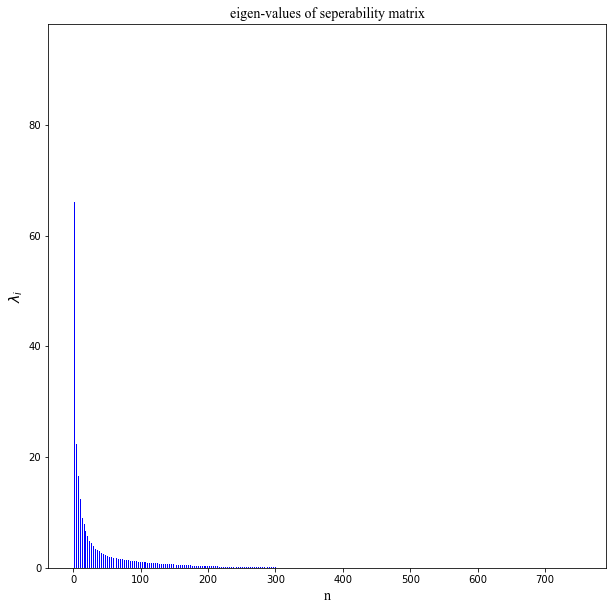

In [25]:
plt.figure(figsize = (10, 10))
plt.bar(np.arange(1, len(D)+1), D, width = 0.5, color = ['b'])
plt.title('eigen-values of seperability matrix', fontname = "Times New Roman",
              fontsize = 14)
plt.ylabel(r'$\lambda_i$', fontname = "Times New Roman",
              fontsize = 14)
plt.xlabel('n', fontname = "Times New Roman", 
              fontsize = 14)

## PCA with 90% of Variance explained (100 components)

Text(0.5, 1.0, 'PCA')

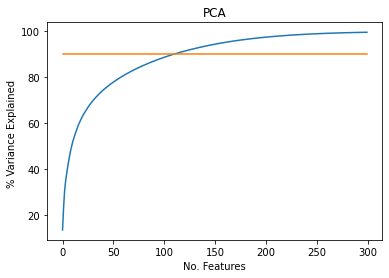

In [26]:
from sklearn.decomposition import PCA
cov = PCA(n_components=300)
cov.fit(x_train)
var = np.cumsum(cov.explained_variance_ratio_)
plt.plot(100*var)
plt.xlabel("No. Features")
plt.ylabel("% Variance Explained ")
plt.plot(range(300), 90*np.ones([300,1]))
plt.title("PCA")

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def eval(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1-Score: {f1_score(y_test, y_pred)}')
    confusion_mtx = confusion_matrix(y_test, y_pred)
    class_names = ['0', '1']
    plot_confusion_matrix(confusion_mtx, class_names)

## PCA w/o whitening

Accuracy: 0.8947368421052632
Precision: 0.9069767441860465
Recall: 0.9669421487603306
F1-Score: 0.9359999999999999


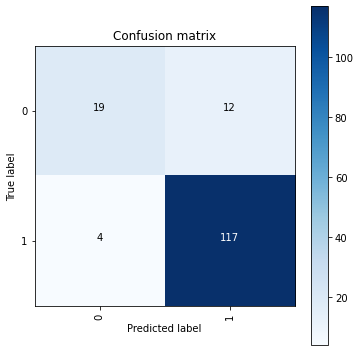

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.decomposition import PCA


pca_ = PCA(n_components=100, whiten=False)
pca_.fit(x_train)
x_train_new = pca_.transform(x_train)
x_test_new = pca_.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## PCA with whitening

Accuracy: 0.8618421052631579
Precision: 0.8676470588235294
Recall: 0.9752066115702479
F1-Score: 0.9182879377431907


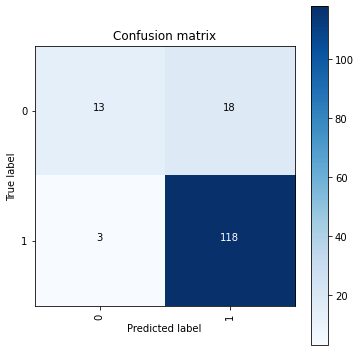

In [29]:
pca_whiten = PCA(n_components=100, whiten=True)
pca_whiten.fit(x_train)
x_train_new = pca_whiten.transform(x_train)
x_test_new = pca_whiten.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## ICA

Accuracy: 0.868421052631579
Precision: 0.8686131386861314
Recall: 0.9834710743801653
F1-Score: 0.922480620155039


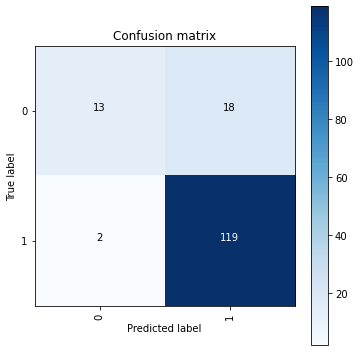

In [30]:
from sklearn.decomposition import FastICA as ica
ica_ = ica(n_components=100)
ica_.fit(x_train, y_train)
x_train_new = ica_.transform(x_train)
x_test_new = ica_.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## LDA

Accuracy: 0.6907894736842105
Precision: 0.8627450980392157
Recall: 0.7272727272727273
F1-Score: 0.789237668161435


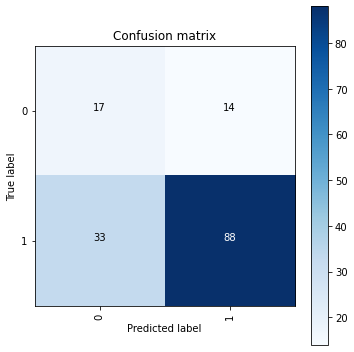

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_ = LDA()
lda_.fit(x_train, y_train)
x_train_new = lda_.transform(x_train)
x_test_new = lda_.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## PCA with 80% of Variance explained (55 components)

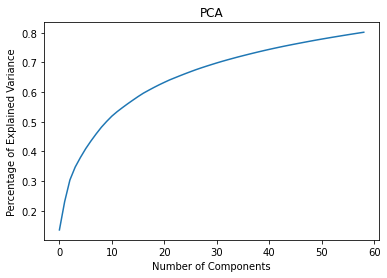

In [32]:
PCA_ = PCA(n_components=0.80)
PCA_.fit(x_train)
eigenvalues = PCA_.explained_variance_ratio_
plt.figure()
plt.plot(range(len(eigenvalues)), np.cumsum(eigenvalues))
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Explained Variance")
plt.title("PCA")
plt.show()

## PCA

Accuracy: 0.9013157894736842
Precision: 0.9076923076923077
Recall: 0.9752066115702479
F1-Score: 0.9402390438247011


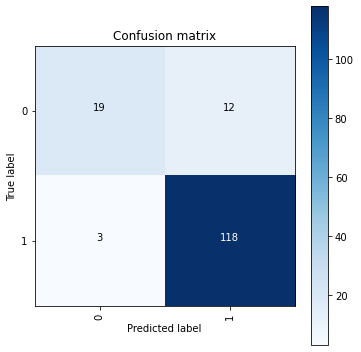

In [33]:
pca_ = PCA(n_components=55, whiten=False)
pca_.fit(x_train)
x_train_new = pca_.transform(x_train)
x_test_new = pca_.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## ICA

Accuracy: 0.9013157894736842
Precision: 0.9076923076923077
Recall: 0.9752066115702479
F1-Score: 0.9402390438247011


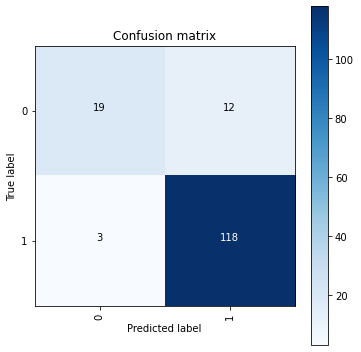

In [34]:
from sklearn.decomposition import FastICA as ica
ica_ = ica(n_components=55)
ica_.fit(x_train, y_train)
x_train_new = ica_.transform(x_train)
x_test_new = ica_.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## Sequential Backward Feature Elimination

In [161]:
from mlxtend.feature_selection import SequentialFeatureSelector
clf = knn(n_neighbors=3)
sfs = SequentialFeatureSelector(clf, k_features=55, forward=False)
pca_ = PCA(n_components=100, whiten=False)
pca_.fit(x_train)
x_train_new = pca_.transform(x_train)
x_test_new = pca_.transform(x_test)
sfs.fit(x_train_new, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          forward=False, k_features=55)

Accuracy: 0.875
Precision: 0.9112903225806451
Recall: 0.9338842975206612
F1-Score: 0.9224489795918367


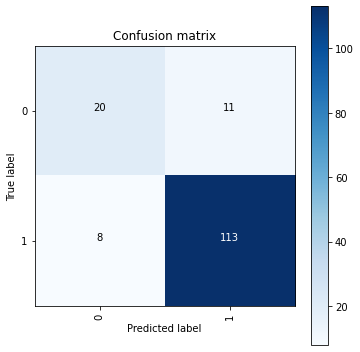

In [162]:
x_train_new = sfs.transform(x_train)
x_test_new = sfs.transform(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)

## Autoencoder

In [145]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

encoder = Sequential()
encoder.add(InputLayer((753,)))
encoder.add(Dense(55))

decoder = Sequential()
decoder.add(InputLayer((55,)))
decoder.add(Dense(753))
decoder.add(Reshape((753,)))

inp = Input((753,))
code = encoder(inp)
reconstruction = decoder(code)

AE = Model(inp, reconstruction)
AE.summary()
AE.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 753)               0         
_________________________________________________________________
sequential_12 (Sequential)   (None, 55)                41470     
_________________________________________________________________
sequential_13 (Sequential)   (None, 753)               42168     
Total params: 83,638
Trainable params: 83,638
Non-trainable params: 0
_________________________________________________________________


In [146]:
history = AE.fit(x_train, x_train, epochs=200, validation_split=.1, batch_size=64)

200
543/543 [==============================] - 0s 103us/step - loss: 0.2344 - accuracy: 0.2192 - val_loss: 0.3079 - val_accuracy: 0.1148
Epoch 65/200
543/543 [==============================] - 0s 108us/step - loss: 0.2332 - accuracy: 0.2210 - val_loss: 0.3070 - val_accuracy: 0.1311
Epoch 66/200
543/543 [==============================] - 0s 92us/step - loss: 0.2320 - accuracy: 0.2247 - val_loss: 0.3063 - val_accuracy: 0.1311
Epoch 67/200
543/543 [==============================] - 0s 103us/step - loss: 0.2308 - accuracy: 0.2265 - val_loss: 0.3057 - val_accuracy: 0.1311
Epoch 68/200
543/543 [==============================] - 0s 119us/step - loss: 0.2297 - accuracy: 0.2376 - val_loss: 0.3049 - val_accuracy: 0.1148
Epoch 69/200
543/543 [==============================] - 0s 92us/step - loss: 0.2286 - accuracy: 0.2376 - val_loss: 0.3043 - val_accuracy: 0.1311
Epoch 70/200
543/543 [==============================] - 0s 105us/step - loss: 0.2276 - accuracy: 0.2339 - val_loss: 0.3036 - val_accura

Accuracy: 0.9078947368421053
Precision: 0.9147286821705426
Recall: 0.9752066115702479
F1-Score: 0.944


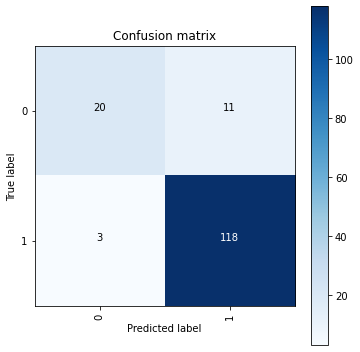

In [148]:
x_train_new = encoder.predict(x_train)
x_test_new = encoder.predict(x_test)
clf = knn(n_neighbors=3)
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
eval(y_test, y_pred)


In [35]:
x_train = ica_.transform(x_train)
x_test = ica_.transform(x_test)

## Generative Classifiers

## Parzen

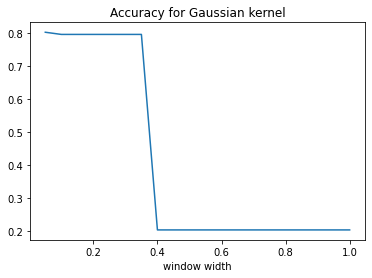

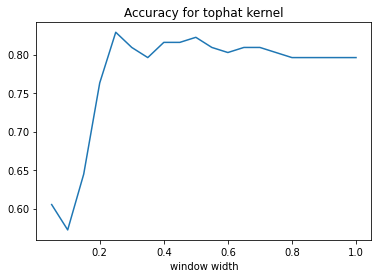

Gaussian kernel with Hn = 0.1:
Accuracy: 0.7960526315789473
Precision: 0.7960526315789473
Recall: 1.0
F1-Score: 0.8864468864468864


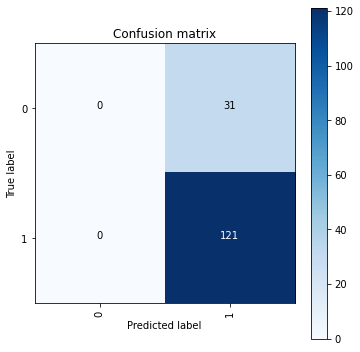

tophat kernel with Hn = 0.25:
Accuracy: 0.8289473684210527
Precision: 0.8321678321678322
Recall: 0.9834710743801653
F1-Score: 0.9015151515151516


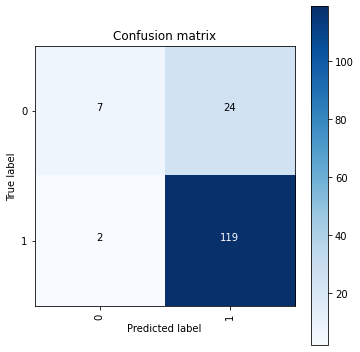

In [17]:
from sklearn.neighbors import KernelDensity
priors = np.array([(y.shape[0] - np.sum(y))/y.shape[0], np.sum(y)/y.shape[0]])

x1= x_train[y_train==1]
x0 = x_train[y_train==0]

def Bayes(f, prior):
    y_pred = np.zeros(y_test.shape)
    for i in range(y_test.shape[0]):
        if f[0][i]*prior[0] < f[1][i]*prior[1]:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

Hn = np.linspace(0.05,1,20)
ACC = []
for h in Hn:
    kde1 = KernelDensity(kernel='gaussian', bandwidth=h).fit(x1)
    f1 = kde1.score_samples(x_test)
    kde0 = KernelDensity(kernel='gaussian', bandwidth=h).fit(x0)
    f0 = kde0.score_samples(x_test)
    f = [f0, f1]
    y_pred = Bayes(f, priors)
    ACC.append(accuracy_score(y_test, y_pred))
plt.plot(Hn,ACC)
plt.xlabel('window width')
plt.title('Accuracy for Gaussian kernel')
plt.show()

ACC = []
for h in Hn:
    kde1 = KernelDensity(kernel='tophat', bandwidth=h).fit(x1)
    f1 = kde1.score_samples(x_test)
    kde0 = KernelDensity(kernel='tophat', bandwidth=h).fit(x0)
    f0 = kde0.score_samples(x_test)
    f = [f0, f1]
    y_pred = Bayes(f, priors)
    ACC.append(accuracy_score(y_test, y_pred))
plt.plot(Hn,ACC)
plt.xlabel('window width')
plt.title('Accuracy for tophat kernel')
plt.show()


print(f'Gaussian kernel with Hn = {Hn[1]}:')
kde1 = KernelDensity(kernel='gaussian', bandwidth=Hn[1]).fit(x1)
f1 = kde1.score_samples(x_test)
kde0 = KernelDensity(kernel='gaussian', bandwidth=Hn[1]).fit(x0)
f0 = kde0.score_samples(x_test)
f = [f0, f1]
y_pred = Bayes(f, priors)
eval(y_test, y_pred)

print(f'tophat kernel with Hn = {Hn[4]}:')
kde1 = KernelDensity(kernel='tophat', bandwidth=Hn[4]).fit(x1)
f1 = kde1.score_samples(x_test)
kde0 = KernelDensity(kernel='tophat', bandwidth=Hn[4]).fit(x0)
f0 = kde0.score_samples(x_test)
f = [f0, f1]
y_pred = Bayes(f, priors)
eval(y_test, y_pred)






## KNN

knn classifier


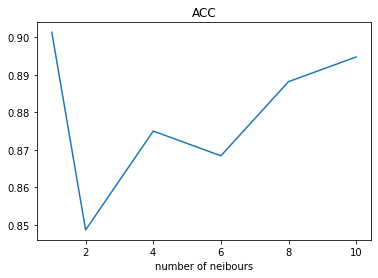

Accuracy: 0.9013157894736842
Precision: 0.9274193548387096
Recall: 0.9504132231404959
F1-Score: 0.9387755102040816


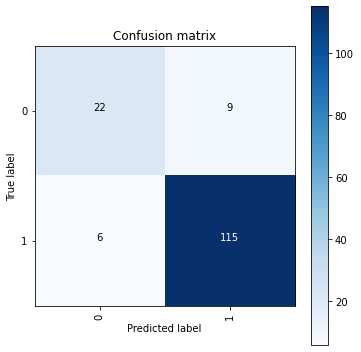

In [48]:
import scipy.spatial.distance as distance
class BayesClassifier(object):
    def __init__(self, PDs, Priors = None, Risk = None):
        '''
        PDs: array of PD object
        Priors: arrays of prior probabilities
        Risk: Risk matrix
        NOTE: all PDs should have the same input dim and Risk mat shape should be (dim, dim)
        '''
        self.PDs = PDs
        self.Priors = Priors
        self.Risk = Risk
        self.C = len(PDs) # number of classes

        if self.Risk is None:
            self.init_Risk()
        if self.Priors is None:
            self.init_Prios()
    
    def init_Risk(self):
        self.Risk = np.ones((self.C, self.C)) - np.eye(self.C)

    def init_Prios(self):
        self.Priors = np.array([1 for i in range(self.C)])

    def classify(self, x):
        prs = np.array([PD for PD in self.PDs]).T * self.Priors
        discs = np.dot(prs, self.Risk)
        return np.argmin(discs, axis = 1)
    
def predict_knn(x, data, labels, K, class_number):
    num_samples = data.shape[0]
    distances = np.array([distance.euclidean(x ,data[i,:]) for i in range(num_samples)])
    index = [i[0] for i in sorted(enumerate(distances), key = lambda x:x[1])[:K]]
    labl = labels[index]
    labl = labl[:,np.newaxis]
    predicts = np.zeros((1,class_number))
    
    for i in range(class_number):
        predicts[:,int(i)] = np.array(np.where(labl == i))[0].shape[0]
    return predicts 

def distribution_estimation(test_data, t_data, train_label, K, class_number):
    dist = np.zeros((test_data.shape[0],class_number))
    count = 0
    for sample in test_data:
        dist[count,:] = predict_knn(sample, t_data, train_label, K, class_number)
        count += 1
    return dist/K

print("knn classifier")
class_number = 2
k_nearest_rate = np.zeros(3)
count = 0
ACC=[]
kk=[1,2,4 ,6,8, 10]
for k in kk:
    class_density_estimation = distribution_estimation(x_test, x_train, y_train, k, class_number)
    class_density_estimation = class_density_estimation.T 
    classifier = BayesClassifier(class_density_estimation)
    y_pred = classifier.classify(x_test)
    ACC.append(accuracy_score(y_test, y_pred))
plt.plot(kk,ACC)
plt.xlabel('number of neibours')
plt.title('ACC')
plt.show()
    
class_density_estimation = distribution_estimation(x_test, x_train, y_train, 1, class_number)
class_density_estimation = class_density_estimation.T 
classifier = BayesClassifier(class_density_estimation)
y_pred = classifier.classify(x_test)
eval(y_test,y_pred)

## GMM

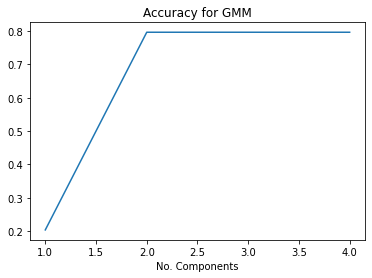

GMM with 2 components
Accuracy: 0.7960526315789473
Precision: 0.7960526315789473
Recall: 1.0
F1-Score: 0.8864468864468864


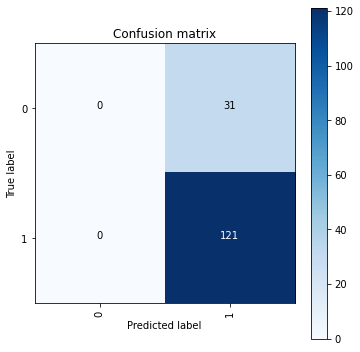

In [18]:
from sklearn.mixture import GaussianMixture
priors = np.array([(y.shape[0] - np.sum(y))/y.shape[0], np.sum(y)/y.shape[0]])

n_components = np.arange(1,5)
ACC = []
for n in n_components:
    GMM1 = GaussianMixture(n_components=n,random_state=0).fit(x1)
    f1 = GMM1.predict(x_test)
    GMM0 = GaussianMixture(n_components=n,random_state=0).fit(x0)
    f0 = GMM0.predict(x_test)
    f = [f0, f1]
    y_pred = Bayes(f, priors)
    ACC.append(accuracy_score(y_test, y_pred))
plt.plot(n_components,ACC)
plt.xlabel('No. Components')
plt.title('Accuracy for GMM')
plt.show()

print(f'GMM with 2 components')
GMM1 = GaussianMixture(n_components=n_components[1],random_state=0).fit(x1)
f1 = GMM1.predict(x_test)
GMM0 = GaussianMixture(n_components=n_components[1],random_state=0).fit(x0)
f0 = GMM0.predict(x_test)
f = [f0, f1]
y_pred = Bayes(f, priors)
eval(y_test, y_pred)



## Discriminative Classifiers

## Logistic Regression

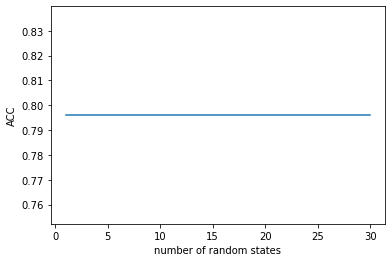

Accuracy: 0.7960526315789473
Precision: 0.7960526315789473
Recall: 1.0
F1-Score: 0.8864468864468864


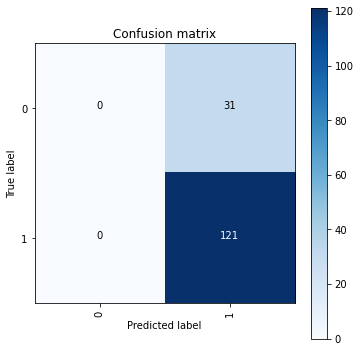

In [37]:
from sklearn.linear_model import LogisticRegression
state = [1,2,3,4,5,6,7,8,9,10,12,14,20,25,30]
ACC = []
for N in state:
    clf = LogisticRegression(random_state=N).fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ACC.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(neibours,ACC)
plt.ylabel('ACC')
plt.xlabel('number of random states')
plt.show()

clf = LogisticRegression(random_state=10).fit(x_train, y_train)
y_pred_log = clf.predict(x_test)
eval(y_test, y_pred_log)

## SVM

best parameters of the model are: {'C': 0.5, 'degree': 1, 'gamma': 2}
Accuracy: 0.868421052631579
Precision: 0.9316239316239316
Recall: 0.9008264462809917
F1-Score: 0.9159663865546218


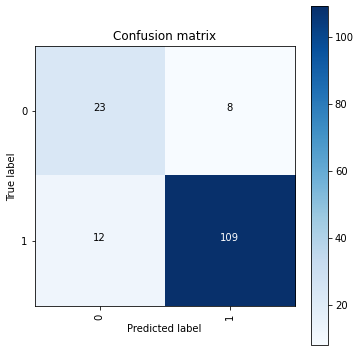

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
model = svm.SVC(kernel='poly',class_weight='balanced', decision_function_shape='ovo')
clf_poly = GridSearchCV(model,param_grid={'C':[.5, .7 ,1, 1.5],'degree':[1 ,2, 3 ,4],
                                   'gamma':[1 ,2 ,3 ,4, 5]},return_train_score='False')
clf_poly.fit(x_train,y_train)
y_pred_svm=clf_poly.predict(x_test)
print('best parameters of the model are:',clf_poly.best_params_)
eval(y_test, y_pred_svm)

## Decision Tree

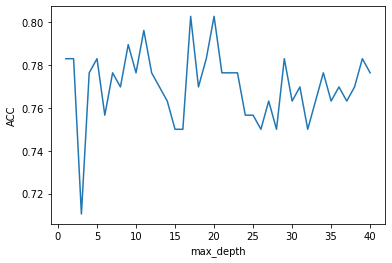

Accuracy: 0.7828947368421053
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


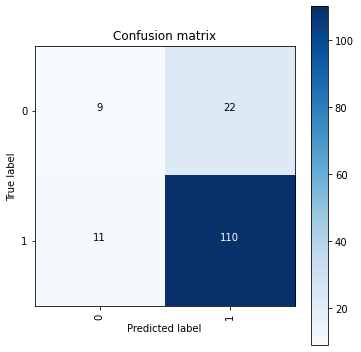

In [39]:
from sklearn import tree

ACC = []
D = [i+1 for i in range(40)]
for D1 in D:
    clf = tree.DecisionTreeClassifier(max_depth=D1)
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ACC.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(D,ACC)
plt.ylabel('ACC')
plt.xlabel('max_depth')
plt.show()


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)
y_pred_tree = clf.predict(x_test)
eval(y_test, y_pred_tree)

## KNN

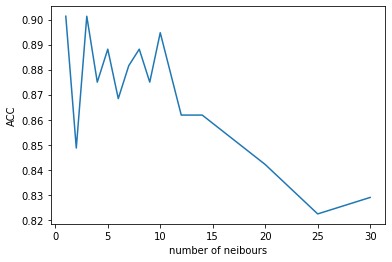

Accuracy: 0.9013157894736842
Precision: 0.9076923076923077
Recall: 0.9752066115702479
F1-Score: 0.9402390438247011


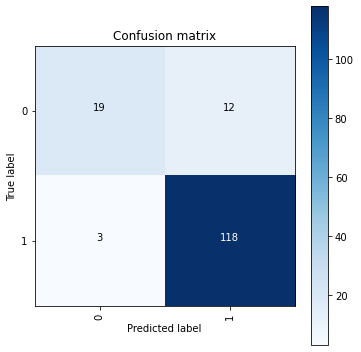

In [35]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neibours = [1,2,3,4,5,6,7,8,9,10,12,14,20,25,30]
ACC = []
for N in neibours:
    classifier = KNeighborsClassifier(n_neighbors=N)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    ACC.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(neibours,ACC)
plt.ylabel('ACC')
plt.xlabel('number of neibours')
plt.show()

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)
eval(y_test, y_pred_knn)

## RBF

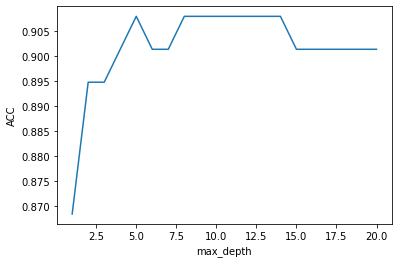

Accuracy: 0.9078947368421053
Precision: 0.9212598425196851
Recall: 0.9669421487603306
F1-Score: 0.9435483870967741


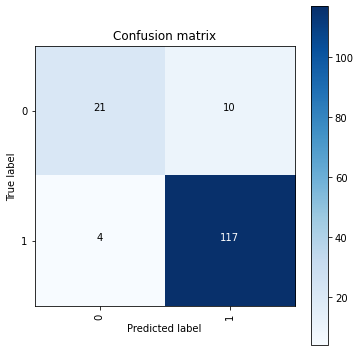

In [38]:

from sklearn.svm import SVC

ACC = []
CC = [i+1 for i in range(20)]
for C1 in CC:
    model = SVC(kernel='rbf', probability=True, C=C1, gamma='scale')
    clf = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ACC.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(CC,ACC)
plt.ylabel('ACC')
plt.xlabel('max_depth')
plt.show()

model = SVC(kernel='rbf', probability=True, C=10, gamma='scale')
clf = model.fit(x_train, y_train)
y_pred_rbf = model.predict(x_test)
eval(y_test, y_pred_rbf)